In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
S0 = 100.0             # asset price
T = 1.0                # time in years
r = 0.02               # risk-free rate
N = 252                # number of time steps in simulation
M = 1000               # number of simulations

# Heston dependent parameters
kappa = 2              # rate of mean reversion of variance under risk-neutral dynamics
theta = 0.01           # long-term mean of variance under risk-neutral dynamics
v0 = 0.25**2           # initial variance under risk-neutral dynamics
rho = 0.7              # correlation between returns and variances under risk-neutral dynamics
sigma = 0.6            # volatility of volatility
theta, v0

(0.04000000000000001, 0.0625)

In [ ]:
def heston_model_sim(S0, v0, rho, kappa, theta, sigma,T, N, M):
    """
    Inputs:
     - S0, v0: initial parameters for asset and variance
     - rho   : correlation between asset returns and variance
     - kappa : rate of mean reversion in variance process
     - theta : long-term mean of variance process
     - sigma : vol of vol / volatility of variance process
     - T     : time of simulation
     - N     : number of time steps
     - M     : number of scenarios / simulations
    
    Outputs:
    - asset prices over time (numpy array)
    - variance over time (numpy array)
    """
    # initialise other parameters
    dt = T/N
    mu = np.array([0,0])
    cov = np.array([[1,rho],
                    [rho,1]])
    # arrays for storing prices and variances
    S = np.full(shape=(N+1,M), fill_value=S0)
    v = np.full(shape=(N+1,M), fill_value=v0)
    # sampling correlated brownian motions under risk-neutral measure
    Z = np.random.multivariate_normal(mu, cov, (N,M))
    for i in range(1,N+1):
        S[i] = S[i-1] * np.exp( (r - 0.5*v[i-1])*dt + np.sqrt(v[i-1] * dt) * Z[i-1,:,0] )
        v[i] = np.maximum(v[i-1] + kappa*(theta-v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt)*Z[i-1,:,1],0)
    
    return S, v

In [96]:
S = 100.0; K=100.0; T=30/365; r=0.0; v=0.1; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=10000; N=30; dt=T/N

In [70]:
from scipy.stats import norm

def bs_call(s0, k, rf, q, sigma, tau, PutCall):
    '''PutCall for 'c', 'p' '''
    d1 = (np.log(s0/k) +((rf - q +0.5*np.power(sigma, 2))*tau))/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)
    value = s0*norm.cdf(d1) - k*np.exp(-rf*tau)*norm.cdf(d2)
    return value

In [72]:
bs_call(S, K, r, 0.0, sigma, T, 'c')

1.143692802624713

In [100]:
mu = np.array([0,0])
cov = np.array([[1,rho],
                [rho,1]])

S_arr = np.full((N+1, M), fill_value=S)
V_arr = np.full((N+1, M), fill_value=v)

Z = np.random.multivariate_normal(mu, cov, (N,M))

for idx in range(1, N+1):
    S_arr[idx] = S_arr[idx-1] * np.exp( (r - 0.5*V_arr[idx-1])*dt + np.sqrt(V_arr[idx-1] * dt) * Z[idx-1,:,0] )
    V_arr[idx] = np.maximum(V_arr[idx-1] + kappa*(theta-V_arr[idx-1])*dt + sigma*np.sqrt(V_arr[idx-1]*dt)*Z[idx-1,:,1],0)

S_arr.shape
(np.exp(-r*(T)) * np.where(S_arr[-1,:] - K >=0, S_arr[-1,:] - K, 0)).mean()

3.522446718695369

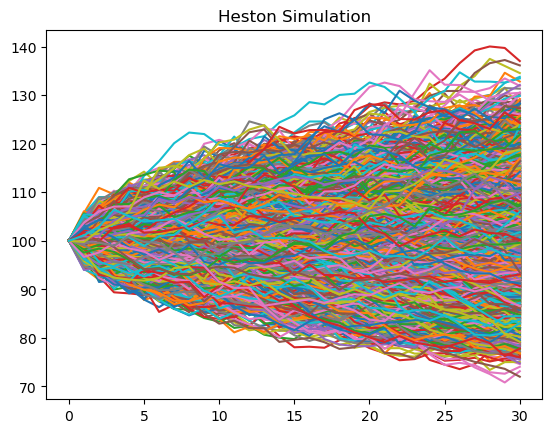

In [101]:
plt.title('Heston Simulation')
plt.plot(S_arr)
plt.show()

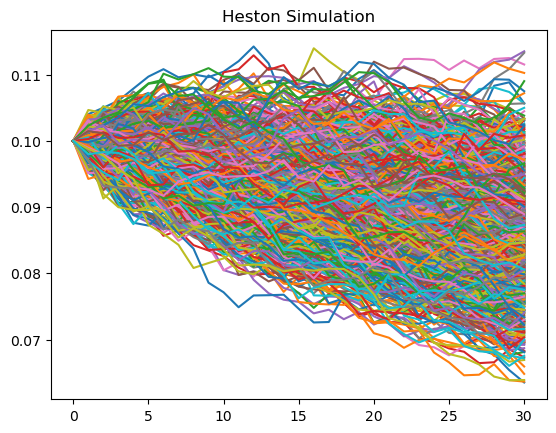

In [60]:
plt.title('Heston Simulation')
plt.plot(V_arr)
plt.show()

## $$ d S_t = \mu S_t dt + \sqrt{v_t} S_t d W_t^S $$
## $$ d v_t = \kappa ( \theta - v_t ) dt + \xi \sqrt{v_t} d W_t^v$$ 

$st. \quad d W_t^S$ and $d W_t^v$ are Weiner Process with $\rho$

$\theta$ : Long Run Average Variance <br>
$\kappa$ : Rate of Mean Reversion <br>
$\xi$ : vol of vol <br>

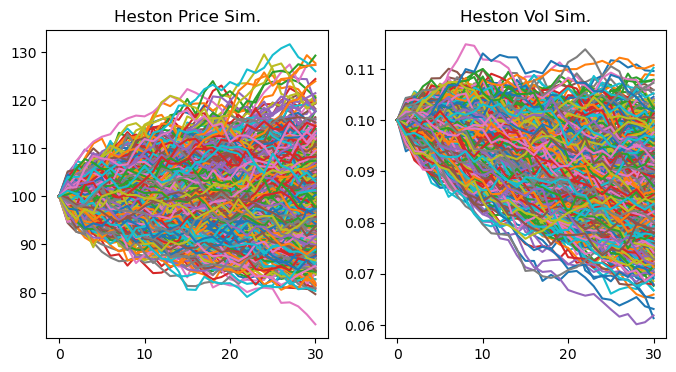

In [112]:
S = 100.0; K=100.0; T=30/365; r=0.0; v=0.1; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=1000; N=30; dt=T/N

mu = np.zeros((2))
cov = np.array([[1, rho],
                [rho, 1]])

S_arr = np.full((N+1, M), fill_value=S)
V_arr = np.full((N+1, M), fill_value=v)

W = np.random.multivariate_normal(mu, cov, (N,M))

for idx in range(1, N+1):
    S_arr[idx] = S_arr[idx-1] * np.exp( (r - 0.5*V_arr[idx-1])*dt + np.sqrt(V_arr[idx-1] * dt) * W[idx-1,:,0] )
    V_arr[idx] = np.maximum(V_arr[idx-1] + kappa*(theta-V_arr[idx-1])*dt + sigma*np.sqrt(V_arr[idx-1]*dt)*W[idx-1,:,1],0)


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Heston Price Sim.')
plt.plot(S_arr)
plt.subplot(1, 2, 2)
plt.title('Heston Vol Sim.')
plt.plot(V_arr)
plt.show()

In [121]:
u_1 = 1/2
u_2 = -1/2
a = kappa*theta
b_1 = kappa+lam

0.02

In [ ]:
'''lambda Use Optimal Cal'''
S = 100.0; K=100.0; T=30/365; r=0.0; v=0.1; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=1000; N=30; dt=T/N

kappa = kappa + lam
theta = kappa*theta / (kappa+lam)

'''p1 계산'''
u = 1/2                             # u1 임
b = kappa - rho * sigma             # b1 임

a = kappa * theta


# d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2*(2 * u * phi * 1j - phi**2))
# g = (b - rho * sigma * phi * 1j)/(b - rho * sigma * phi * 1j - d)
# C = r * phi * 1j * T + (a/sigma**2) *\
#     (( b - rho * sigma * phi * 1j - d)*T - np.log((1-g*np.exp(d*T))/(1-g)))
# D = (b - rho * sigma * phi * 1j)/(sigma**2) *\
#     ((1-np.exp(d * T))/(1 - g * np.exp(d * T)))



In [35]:
def f_cal (phi, kappa, theta, sigma, rho, v, r, T, s0, status):
    if status == 1:
        u = 1/2
        b = kappa - rho * sigma
    
    else:
        u = -1/2
        b = kappa

    a = kappa * theta
    x = np.log(s0)
    d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2*(2 * u * phi * 1j - phi**2))
    g = (b - rho * sigma * phi * 1j)/(b - rho * sigma * phi * 1j - d)
    C = r * phi * 1j * T + (a/sigma**2) *\
        (( b - rho * sigma * phi * 1j - d)*T - np.log((1-g*np.exp(d*T))/(1-g)))
    D = (b - rho * sigma * phi * 1j)/(sigma**2) *\
        ((1-np.exp(d * T))/(1 - g * np.exp(d * T)))

    return np.exp(C + D * v + 1j * phi * x)


In [3]:
0.5 + 1/np.pi * integral_term(0, 1000)

<function __main__.<lambda>(phi)>

In [120]:
0.5 * (1/np.pi)

0.15915494309189535

In [6]:
class heston_option_cal:
    
    def f_cal (phi, kappa:float, theta:float, sigma:float, rho:float, v:float, r:float, T:float, s0:float, status:float):
        
        if status == 1:
            u = 1/2
            b = kappa - rho * sigma

        else:
            u = -1/2
            b = kappa

        a = kappa * theta
        s = np.log(S)
        g = (b - rho * sigma* phi * 1j + d) / (b - rho * sigma * phi * 1j - d)
        d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2 * ( 2 * u * phi * 1j - phi**2))
        D = (b - rho * sigma * phi * 1j + d) / (sigma**2) * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))
        C = r * phi * 1j * T + a/sigma**2 * ((b - rho*sigma*phi*1j)*T - 2 * np.log((1 - g * np.exp(d*T))/(1 - g)))

        f = np.exp(C + D*v + 1j*phi*s)

        return f

    def p_cal (kappa, theta, sigma, rho, v, r, T, S, K, status):
        integ = np


In [60]:
S = 100.0; K=100.0; T=30; r=0.0; v=0.1; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=1000; N=30; dt=T/N


In [54]:
def f_cal (phi, S, K, T, r, v, kappa, theta, lam, sigma, rho, status=1):
    
    if status == 1:
        u = 1/2
        b = kappa - rho * sigma

    else:
        u = -1/2
        b = kappa

    x = np.log(S)
    
    a = kappa * theta

    d = np.sqrt( (rho * sigma * phi * 1j - 2*b)**2 - sigma**2 * (2 * u * phi * 1j - phi**2) )

    tmp = b - rho * sigma * phi * 1j + d

    g = (tmp) / (tmp - 2 * d)
    D = (tmp/sigma**2) * ((1-np.exp(d * T))/(1 - g * np.exp(d * T)))
    C = r * phi * 1j * T + (a/sigma**2) * (tmp * T - 2 * np.log((1 - g * np.exp(d * T))/(1 - g)))

    f = np.exp(C + D*v + 1j*phi*x)
    return f

def p_cal (S, K, T, r, v, kappa, theta, lam, sigma, rho, status):

    args = (S, K, T, r, v, kappa, theta, lam, sigma, rho, status)
    # a    = np.arange(1e-20, 1, 0.001)
    # b    = np.arange(1,250,0.1)
    # phi = np.hstack( (a,b) )
    phi = np.arange(0.001, 100, 0.001)

    integral_term = (np.exp(- 1j * phi * np.log(K) * f_cal(phi, *args))/(1j*phi+1))
    
    return 0.5 + 1/np.pi * np.real(np.trapz(integral_term, phi))


In [ ]:
np.trapz()

In [55]:
S = 100.0; K=100.0; T=30/365; r=0.0; v=0.01; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=1000; N=30; dt=T/N

p1 = p_cal(S, K, T, r, v, kappa, theta, lam, sigma, rho, 1)
p2 = p_cal(S, K, T, r, v, kappa, theta, lam, sigma, rho, 2)
p1, p2
S * p1 - K * np.exp(-r * T) * p2

541903395547.8324

0.005339082619972402

In [2]:
from scipy.integrate import quad
from scipy.optimize import minimize 

In [3]:
S = 100.0; K=100.0; T=30/365; r=0.0; v=0.01; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=1000; N=30; dt=T/N


phi = np.arange(0.01, 100, 0.1)

args = (S, K, T, r, v, kappa, theta, lam, sigma, rho)

tau = T - 0
'''p1_cal'''
def f1_cal (phi, S, K, tau, r, v, kappa, theta, lam, sigma, rho):

    x = np.log(S)
    u = 1/2
    a = kappa * theta
    b = kappa + lam - rho * sigma

    d = np.sqrt( (rho * sigma * phi * 1j - 2*b)**2 - sigma**2 * (2 * u * phi * 1j - phi**2) )

    tmp = b - rho * sigma * phi * 1j + d

    g = (tmp) / (tmp - 2 * d)
    D = (tmp/sigma**2) * ((1-np.exp(d * tau))/(1 - g * np.exp(d * tau)))
    C = r * phi * 1j * tau + (a/sigma**2) * (tmp * tau - 2 * np.log((1 - g * np.exp(d * tau))/(1 - g)))

    f = np.exp(C + D*v + 1j*phi*x)
    return f

def f2_cal (phi, S, K, tau, r, v, kappa, theta, lam, sigma, rho):

    x = np.log(S)
    u = -1/2
    a = kappa * theta
    b = kappa + lam

    d = np.sqrt( (rho * sigma * phi * 1j - 2*b)**2 - sigma**2 * (2 * u * phi * 1j - phi**2) )

    tmp = b - rho * sigma * phi * 1j + d

    g = (tmp) / (tmp - 2 * d)
    D = (tmp/sigma**2) * ((1-np.exp(d * tau))/(1 - g * np.exp(d * tau)))
    C = r * phi * 1j * tau + (a/sigma**2) * (tmp * tau - 2 * np.log((1 - g * np.exp(d * tau))/(1 - g)))

    f = np.exp(C + D*v + 1j*phi*x)
    return f

def integ_1 (phi, S, K, T, r, v, kappa, theta, lam, sigma, rho):
    integ = np.real((np.exp(-1j * phi * np.log(K)) * f1_cal(phi, S, K, T, r, v, kappa, theta, lam, sigma, rho))/(1j * phi))
    return integ


def integ_2 (phi, S, K, T, r, v, kappa, theta, lam, sigma, rho):
    integ = np.real((np.exp(-1j * phi * np.log(K)) * f2_cal(phi, S, K, T, r, v, kappa, theta, lam, sigma, rho))/(1j * phi))
    return integ


#np.real(np.trapz(phi, integ(phi, *args)))

#quad(integ, 0, 100, args=args)

import scipy.integrate as integrate

p1 = integrate.quad(lambda phi : (np.exp(-1j * phi * np.log(K)) * f1_cal(phi, S, K, T, r, v, kappa, theta, lam, sigma, rho))/(1j * phi), 0, 1000)[0]
p2 = integrate.quad(lambda phi : (np.exp(-1j * phi * np.log(K)) * f2_cal(phi, S, K, T, r, v, kappa, theta, lam, sigma, rho))/(1j * phi), 0, 1000)[0]


S * p1 - K * np.exp(-r * T) * p2

/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:523: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


2.1809847697855513

In [56]:
from scipy.integrate import quad
from scipy.optimize import minimize 

def heston_charfunc(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    
    # constants
    a = kappa*theta
    b = kappa+lambd
    
    # common terms w.r.t phi
    rspi = rho*sigma*phi*1j
    
    # define d parameter given phi and b
    d = np.sqrt( (rho*sigma*phi*1j - b)**2 + (phi*1j+phi**2)*sigma**2 )
    
    # define g parameter given phi, b and d
    g = (b-rspi+d)/(b-rspi-d)
    
    # calculate characteristic function by components
    exp1 = np.exp(r*phi*1j*tau)
    term2 = S0**(phi*1j) * ( (1-g*np.exp(d*tau))/(1-g) )**(-2*a/sigma**2)
    exp2 = np.exp(a*tau*(b-rspi+d)/sigma**2 + v0*(b-rspi+d)*( (1-np.exp(d*tau))/(1-g*np.exp(d*tau)) )/sigma**2)

    return exp1*term2*exp2

def integrand(phi, S0, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    numerator = np.exp(r*tau)*heston_charfunc(phi-1j,*args) - K*heston_charfunc(phi,*args)
    denominator = 1j*phi*K**(1j*phi)
    return numerator/denominator

def heston_price_rec(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    
    P, umax, N = 0, 100, 10000
    dphi=umax/N #dphi is width

    for i in range(1,N):
        # rectangular integration
        phi = dphi * (2*i + 1)/2 # midpoint to calculate height
        numerator = np.exp(r*tau)*heston_charfunc(phi-1j,*args) - K * heston_charfunc(phi,*args)
        denominator = 1j*phi*K**(1j*phi)
        
        P += dphi * numerator/denominator
        
    return np.real((S0 - K*np.exp(-r*tau))/2 + P/np.pi)

def heston_price(S0, K, v0, kappa, theta, sigma, rho, lambd, tau, r):
    args = (S0, v0, kappa, theta, sigma, rho, lambd, tau, r)
    
    real_integral, err = np.real( quad(integrand, 0, 100, args=args) )
    
    return (S0 - K*np.exp(-r*tau))/2 + real_integral/np.pi

In [57]:
S = 100.0; K=100.0; T=30/365; r=0.0; v=0.01; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=1000; N=30; dt=T/N
heston_price(S, K, v, kappa, theta, sigma, rho, lam, T, r)

/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/scipy/integrate/quadpack.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


1.134531084966607

In [16]:
phi = np.arange(0.0001, 100, 0.0001)

f_cal(phi, kappa, theta, sigma, rho, v, r, T, S, 1)

array([ 7.19810548e-01+3.31789694e-04j,  7.19810318e-01+6.63579318e-04j,
        7.19809936e-01+9.95368800e-04j, ...,
       -1.77661734e-17+2.45472342e-17j, -1.77762236e-17+2.45373068e-17j,
       -1.77862685e-17+2.45273755e-17j])

In [5]:
S = 100.0; K=100.0; T=30/365; r=0.0; v=0.01; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=1000; N=30; dt=T/N

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def f_heston (S, St, K, r, T, sigma, kappa, theta, vol, rho):

    prod = rho * sigma * 1j * S

    d1 = (prod - kappa)**2
    d2 = (sigma**2) * (1j * S + S**2)
    d = np.sqrt(d1 + d2)

    g1 = kappa - prod - d
    g2 = kappa - prod + d
    g = g1/g2

    # Calculate first exponential
    exp1 = np.exp(np.log(St) * 1j * S) * np.exp(1j * S * r* T)
    exp2 = 1 - g * np.exp(-d *T)
    exp3 = 1- g
    mainExp1 = exp1*np.power(exp2/exp3, -2*theta*kappa/(sigma**2))
    
    # Calculate second exponential
    exp4 = theta * kappa * T/(sigma **2)
    exp5 = vol/(sigma **2)
    exp6 = (1 - np.exp(-d * T))/(1 - g * np.exp(-d * T))
    mainExp2 = np.exp((exp4 * g1) + (exp5 *g1 * exp6))
    
    return (mainExp1 * mainExp2)

def priceHestonMid(St, K, r, T, sigma, kappa, theta, vol, rho):
    P, iterations, maxNumber = 0,1000,100
    ds = maxNumber/iterations
    
    element1 = 0.5 * (St - K * np.exp(-r * T))

    for j in range(1, iterations):
        s1 = ds * (2*j + 1)/2
        s2 = s1 - 1j
        
        numerator1 = f_heston(s2,  St, K, r, T, 
                             sigma, kappa, theta, vol, rho)
        numerator2 = K * f_heston(s1,  St, K, r, T, 
                             sigma, kappa, theta, vol, rho)
        denominator = np.exp(np.log(K) * 1j * s1) *1j *s1

        P += ds *(numerator1 - numerator2)/denominator
    
    element2 = P/np.pi
    
    return np.real((element1 + element2))

In [8]:
priceHestonMid(S, K, r, T, sigma, kappa, theta, v, rho)

1.1319148571716087

In [9]:
S = 100.0; K=100.0; T=30/365; r=0.0; v=0.1; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=1000; N=30; dt=T/N

phi = np.arange(0.01, 100.0, 0.01)

u = 1/2
b = kappa - rho * sigma
    
a = kappa * theta
x = np.log(S)
d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2*(2 * u * phi * 1j - phi**2))
g = (b - rho * sigma * phi * 1j + d)/(b - rho * sigma * phi * 1j - d)
C = r * phi * 1j * T + (a/sigma**2) *\
    (( b - rho * sigma * phi * 1j - d)*T - np.log((1-g*np.exp(d*T))/(1-g)))
D = (b - rho * sigma * phi * 1j)/(sigma**2) *\
    ((1-np.exp(d * T))/(1 - g * np.exp(d * T)))

func = np.real(np.exp(-1j * phi * np.log(K)) * np.exp(C + D * v + 1j * phi * x) / (1j * phi))
def f_cal(phi, kappa, theta, sigma, rho, v0, r, T, s0, status):
        
    if status == 1:
        u = 0.5
        b = kappa - rho * sigma
    else:
        u = -0.5
        b = kappa
    
    a = kappa * theta
    x = np.log(s0)
    d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2 * (2 * u * phi * 1j - phi**2))
    g = (b - rho * sigma * phi * 1j + d) / (b - rho * sigma * phi * 1j - d)
    C = r * phi * 1j * T + (a / sigma**2)*((b - rho * sigma * phi * 1j + d) * T - 2 * np.log((1 - g * np.exp(d * T))/(1 - g)))
    D = (b - rho * sigma * phi * 1j + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))
    return np.exp(C + D * v0 + 1j * phi * x)
    

integrand = np.real(lambda phi: (np.exp(-1j * phi * np.log(K)) * f_cal(phi, kappa, theta, sigma, rho, v0, r, T, S, 1) / (1j * phi))) 

ans = quad(integrand, 0, 100)[0]

p1 = ans
p1

ValueError: invalid callable given

In [77]:
S = 100.0; K=100.0; T=30/365; r=0.0; v=0.1; kappa=2.0; theta=0.01; lam=0.0; sigma=0.1; rho=0.0; M=1000; N=30; dt=T/N

phi = np.arange(0.01, 100.0, 0.01)

u = -1/2
b = kappa
    
a = kappa * theta
x = np.log(S)
d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2*(2 * u * phi * 1j - phi**2))
g = (b - rho * sigma * phi * 1j + d)/(b - rho * sigma * phi * 1j - d)
C = r * phi * 1j * T + (a/sigma**2) *\
    (( b - rho * sigma * phi * 1j - d)*T - np.log((1-g*np.exp(d*T))/(1-g)))
D = (b - rho * sigma * phi * 1j)/(sigma**2) *\
    ((1-np.exp(d * T))/(1 - g * np.exp(d * T)))

func = np.real(np.exp(-1j * phi * np.log(K)) * np.exp(C + D * v + 1j * phi * x) / (1j * phi))

ans = np.trapz(fuphi)

p2 = ans
p2

-0.03043570631292804

In [23]:
from scipy.integrate import quad

In [ ]:
integrand = lambda phi: (np.exp(-1j * phi * np.log(K)) * 
__f(phi, kappa, theta, sigma, rho, v0, r, T, s0, status) / (1j * phi)).real    
return (0.5 + (1 / np.pi) * quad(integrand, 0, 100)[0])

In [78]:
S * p1 - K * np.exp(-r*T) * p2

6.0871412625856065

In [ ]:
np.trapz()

In [24]:
from scipy import *
from scipy.integrate import quad
#public
def call_price(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K):
    p1 = __p1(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K)
    p2 = __p2(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K)
    return (s0 * p1 - K * np.exp(-r * T) * p2)

#private
def __p(kappa, theta, sigma, rho, v0 ,r ,T ,s0 , K, status):
    integrand = lambda phi: (np.exp(-1j * phi * np.log(K)) * 
    __f(phi, kappa, theta, sigma, rho, v0, r, T, s0, status) / (1j * phi)).real    
    return (0.5 + (1 / np.pi) * quad(integrand, 0, 100)[0])

def __p1(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K):
    return __p(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K, 1)

def __p2(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K):
    return __p(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,K, 2)
    
def __f(phi, kappa, theta, sigma, rho, v0, r, T, s0, status):
        
    if status == 1:
        u = 0.5
        b = kappa - rho * sigma
    else:
        u = -0.5
        b = kappa
    
    a = kappa * theta
    x = np.log(s0)
    d = np.sqrt((rho * sigma * phi * 1j - b)**2 - sigma**2 * (2 * u * phi * 1j - phi**2))
    g = (b - rho * sigma * phi * 1j + d) / (b - rho * sigma * phi * 1j - d)
    C = r * phi * 1j * T + (a / sigma**2)*((b - rho * sigma * phi * 1j + d) * T - 2 * np.log((1 - g * np.exp(d * T))/(1 - g)))
    D = (b - rho * sigma * phi * 1j + d) / sigma**2 * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))
    return np.exp(C + D * v0 + 1j * phi * x)
    
    

In [70]:
import numpy as np
#maturity
T = 0.5
#risk free rate
r = 0.05
#long term volatility(equiribrium level)
theta = 0.01
#Mean reversion speed of volatility
kappa = 2.0
#sigma(volatility of Volatility)나
sigma = 0.225
#rho
rho = 0.0
#Initial stock price
s0 = 100.0
K = 100.0
#Initial volatility
v = 0.01
#0.634

call_price(kappa, theta, sigma, rho, v, r, T, s0, 0.5)


99.5123490456723

In [ ]:
if __name__ == '__main__':

    import numpy as np
    import matplotlib.pyplot as plt

    #maturity
    T = 30/360
    #risk free rate
    r = 0.0
    #long term volatility(equiribrium level)
    theta = 0.1
    #Mean reversion speed of volatility
    kappa = 2.0
    #sigma(volatility of Volatility)
    sigma = 0.1
    #rho
    rho = 0.0
    #Initial stock price
    s0 = 100.0
    #Initial volatility
    v0 = 0.1
    #0.634
    
    print(call_price(kappa, theta, sigma, rho, v0, r, T, s0, 0.5))
    #0.384
    print(call_price(kappa, theta, sigma, rho, v0, r, T, s0, 1.0))
    #0.176
    print(call_price(kappa, theta, sigma, rho, v0, r, T, s0, 1.5)) 
    
    #Strikes
    K = np.arange(0.1, 5.0, 0.25)

    #simulation
    imp_vol = np.array([])

    for k in K:
        #calc option price
        price = call_price(kappa, theta, sigma, rho, v0 ,r ,T ,s0 ,k)
        #calc implied volatility
        imp_vol = np.append(imp_vol, black_sholes.implied_volatility(price, s0, k, T, r, 'C'))
        print k, price, imp_vol[-1]

    #plot result
    plt.plot(K, imp_vol)
    plt.xlabel('Strike (K)')
    plt.ylabel('Implied volatility')
    plt.title('Volatility skew by Heston model')
    plt.show()